In [1]:
import pandas as pd
import numpy as np

In [17]:
Balance_Sheet=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Balance_Sheet.csv',index_col='BDT Per Billon')
Cash_flow=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Cash_flow.csv',index_col='BDT Per Billon')
Income_Statement=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Income_statement.csv',index_col='BDT Per Billon')

In [3]:
Balance_Sheet.columns=[int(i) for i in Balance_Sheet.columns]
Cash_flow.columns=[int(i) for i in Balance_Sheet.columns]
Income_Statement.columns=[int(i) for i in Balance_Sheet.columns]
type(Income_Statement.columns[2])

numpy.int64

In [4]:
Income_Statement.loc['Net Income',Balance_Sheet.columns[4]]+Income_Statement.loc[
    'Interest Expense',Balance_Sheet.columns[4]]+Income_Statement.loc[
    'Income Tax',Balance_Sheet.columns[4]]

985570000.0

In [5]:
Income_Statement.loc['EBITDA',Balance_Sheet.columns[4]]

1900000000.0

In [6]:
Analysis=pd.DataFrame(columns=[int(i) for i in Balance_Sheet.columns],index=['EPS','ROA','ROE','ROCE',
                                                                 'Total Liabilities / Total Assets',
                                                                'Total Current Assets','Total Non-Current Liabelities','Total Non-Current Assets',
                                                                 'Long-term Debt','ST Debt & Current Portion LT Debt',
                                                                 'Total Current Liabilities',
                                                                 'EBIT','Total Capital Employed',
                                                                 'Gross Profit Margin','Asset turnover','Inventories','Liquidity','long-term Debt to Asstes'
                                                                ,'Net Income Growth','Net Assets/Shareholders Equity'])
Analysis

,2018,2019,2020,2021,2022
EPS,NaN,NaN,NaN,NaN,NaN
ROA,NaN,NaN,NaN,NaN,NaN
ROE,NaN,NaN,NaN,NaN,NaN
ROCE,NaN,NaN,NaN,NaN,NaN
Total Liabilities / Total Assets,NaN,NaN,NaN,NaN,NaN
Total Current Assets,NaN,NaN,NaN,NaN,NaN
Total Non-Current Liabelities,NaN,NaN,NaN,NaN,NaN
Total Non-Current Assets,NaN,NaN,NaN,NaN,NaN
Long-term Debt,NaN,NaN,NaN,NaN,NaN
ST Debt & Current Portion LT Debt,NaN,NaN,NaN,NaN,NaN


In [7]:
def EPS(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['EPS (Basic)',i])

def ROA(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]/Balance_Sheet.loc['Total Assets',i])

def ROE(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]/Balance_Sheet.loc["Total Shareholders' Equity",i])

def EBIT(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]+Income_Statement.loc[
    'Interest Expense',i]+Income_Statement.loc[
    'Income Tax',i])

def ROCE(Balance_Sheet,Cash_flow,Income_Statement):
    return((Income_Statement.loc['Net Income',i]+Income_Statement.loc[
    'Interest Expense',i]+Income_Statement.loc[
    'Income Tax',i])/(Balance_Sheet.loc["Total Assets",i]-Balance_Sheet.loc["Total Current Liabilities",i]))


In [8]:
for i in Analysis.columns:
    Analysis.loc['EPS',i]=EPS(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROA',i]=ROA(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROE',i]=ROE(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['EBIT',i]=EBIT(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROCE',i]=ROCE(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['Net Assets/Shareholders Equity',i]=(Balance_Sheet.loc['Total Assets',i]-Balance_Sheet.loc['Total Liabilities',i])
    Analysis.loc['Total Non-Current Liabelities',i]=Balance_Sheet.loc['Total Liabilities',i]-Balance_Sheet.loc['Total Current Liabilities',i]
    Analysis.loc['Total Liabilities / Total Assets',i]=Balance_Sheet.loc['Total Liabilities / Total Assets',i]
    Analysis.loc['Total Current Liabilities',i]=Balance_Sheet.loc['Total Current Liabilities',i]
    Analysis.loc['Total Non-Current Assets',i]=Balance_Sheet.loc['Total Assets',i]-Balance_Sheet.loc["Total Current Assets",i]
    Analysis.loc['Long-term Debt',i]=Balance_Sheet.loc['Long-Term Debt',i]
    Analysis.loc['Total Current Assets',i]=Balance_Sheet.loc['Total Current Assets',i]
    Analysis.loc['Net Income Growth',i]=Income_Statement.loc['Net Income Growth',i]
    Analysis.loc['Inventories',i]=Balance_Sheet.loc['Inventories',i]
    Analysis.loc['Total Capital Employed',i]=Balance_Sheet.loc["Total Assets",i]-Balance_Sheet.loc["Total Current Liabilities",i]
    Analysis.loc['ST Debt & Current Portion LT Debt',i]=Balance_Sheet.loc["ST Debt & Current Portion LT Debt",i]
    Analysis.loc['Liquidity',i]=Balance_Sheet.loc["Total Current Liabilities",i]/Balance_Sheet.loc["Total Current Assets",i]
    Analysis.loc['Gross Profit Margin',i]=(Income_Statement.loc['Sales/Revenue',i]-Income_Statement.loc['Cost of Goods Sold (COGS) incl. D&A',i])/Income_Statement.loc['Sales/Revenue',i]
    if i==Analysis.columns[0]:
        Analysis.loc['Asset turnover',i]=Income_Statement.loc["Sales/Revenue",i]/((Balance_Sheet.loc['Total Assets',i]+Balance_Sheet.loc['Total Assets',i])/2)
    else:
        Analysis.loc['Asset turnover',i]=Income_Statement.loc["Sales/Revenue",i]/((Balance_Sheet.loc['Total Assets',i]+Balance_Sheet.loc['Total Assets',i-1])/2)

    Analysis.loc['long-term Debt to Asstes',i]=Analysis.loc["Total Non-Current Liabelities",i]/Analysis.loc["Total Non-Current Assets",i]

    

In [9]:
Analysis

,2018,2019,2020,2021,2022
EPS,9.99,9.45,4.87,8.11,10.64
ROA,0.009047,0.008098,0.003591,0.00598,0.006776
ROE,0.047211,0.04369,0.022502,0.036439,0.046231
ROCE,0.205224,0.202258,0.167542,0.126972,0.091938
Total Liabilities / Total Assets,0.8084,0.8146,0.8403,0.8359,0.8535
Total Current Assets,10260000000.0,10710000000.0,10560000000.0,10310000000.0,12170000000.0
Total Non-Current Liabelities,1400000000.0,1650000000.0,3690000000.0,5630000000.0,7730000000.0
Total Non-Current Assets,4090000000.0,4450000000.0,7050000000.0,7300000000.0,8230000000.0
Long-term Debt,1070000000.0,1320000000.0,3320000000.0,5320000000.0,7410000000.0
ST Debt & Current Portion LT Debt,8880000000.0,9490000000.0,10040000000.0,8150000000.0,8560000000.000001


In [10]:
Analysis.columns=[str(i) for i in Analysis.columns]
Analysis.columns=pd.to_datetime(Analysis.columns)#+pd.offsets.YearEnd()#pd.offsets.MonthEnd
Analysis

,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
EPS,9.99,9.45,4.87,8.11,10.64
ROA,0.009047,0.008098,0.003591,0.00598,0.006776
ROE,0.047211,0.04369,0.022502,0.036439,0.046231
ROCE,0.205224,0.202258,0.167542,0.126972,0.091938
Total Liabilities / Total Assets,0.8084,0.8146,0.8403,0.8359,0.8535
Total Current Assets,10260000000.0,10710000000.0,10560000000.0,10310000000.0,12170000000.0
Total Non-Current Liabelities,1400000000.0,1650000000.0,3690000000.0,5630000000.0,7730000000.0
Total Non-Current Assets,4090000000.0,4450000000.0,7050000000.0,7300000000.0,8230000000.0
Long-term Debt,1070000000.0,1320000000.0,3320000000.0,5320000000.0,7410000000.0
ST Debt & Current Portion LT Debt,8880000000.0,9490000000.0,10040000000.0,8150000000.0,8560000000.000001


In [11]:
pd.read_html('https://www.dsebd.org/displayCompany.php?name=APEXFOOT')[324]

,0,1,2,3
0,Authorized Capital (mn),500.00,Debut Trading Date,NaN
1,Paid-up Capital (mn),130.00,Type of Instrument,Equity
2,Face/par Value,10.0,Market Lot,1
3,Total No. of Outstanding Securities,12993750,Sector,Tannery Industries
4,Closing Price Graph: -Select Option- 1 month...,Closing Price Graph: -Select Option- 1 month...,Closing Price Graph: -Select Option- 1 month...,Closing Price Graph: -Select Option- 1 month...


In [12]:
Outstanding_Securities=int(pd.read_html('https://www.dsebd.org/displayCompany.php?name=APEXFOOT')[324][1][3])
Outstanding_Securities

12993750

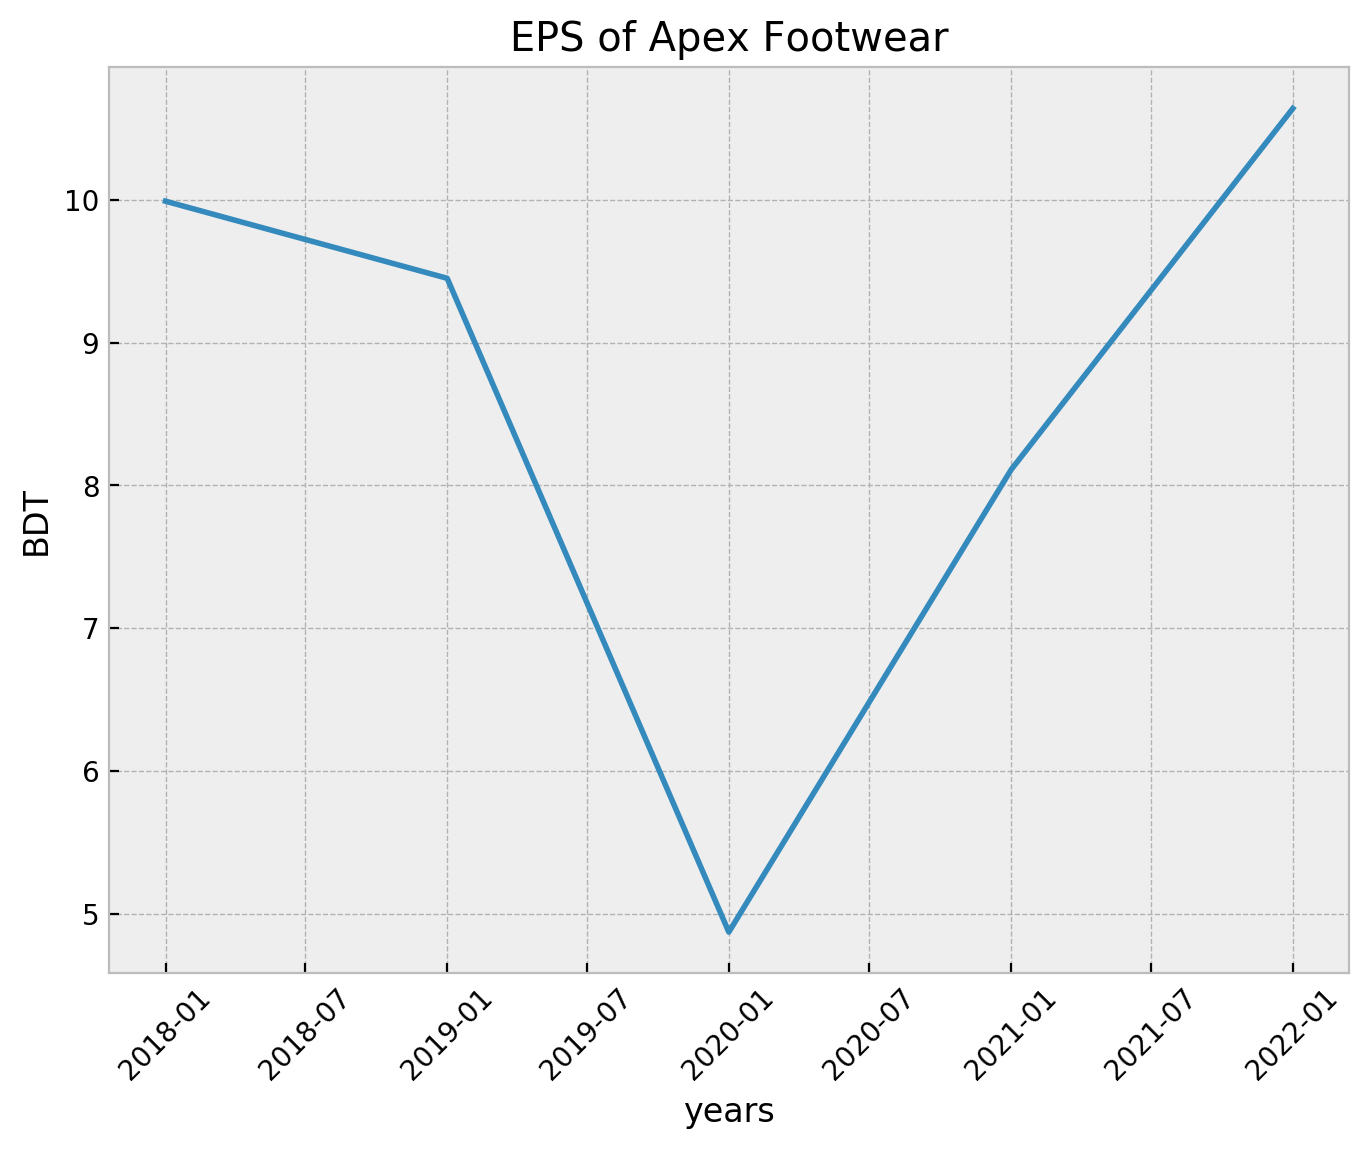

In [13]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(8, 6), dpi=200)
plt.title('EPS of Apex Footwear')
plt.plot(np.array(Analysis.columns),np.array(Analysis.loc['EPS'].values))
plt.xlabel('years')
plt.ylabel('BDT')
plt.xticks(rotation=45)
plt.show()

In [18]:
plt.figure(figsize=(60,50), dpi=200)
plt.style.use('seaborn')
for i in range(1,20):
    plt.subplot(5, 5, i)
    plt.plot(np.array(Balance_Sheet.columns),np.array(Analysis.loc[Analysis.index[i]].values),linewidth=12)
    plt.scatter(np.array(Balance_Sheet.columns),np.array(Analysis.loc[Analysis.index[i]].values),color='r',linewidth=15)
    plt.title(Analysis.index[i],fontsize=35,)
    plt.xticks(fontsize=35)
    plt.yticks(rotation=35,fontsize=30)

In [15]:
from matplotlib import style
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [19]:
(Balance_Sheet.loc['Total Assets','2022']-Balance_Sheet.loc['Total Liabilities','2022'])/Outstanding_Securities#NAV without dividend

230.1106301106301